<a href="https://colab.research.google.com/github/Devlaxman93/Neurohackers/blob/experimental-code/TCA_NMA_project_TCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [72]:
import os
os.getcwd() 

my_dir = "/content/drive/My Drive/Colab Notebooks/Neuromatch Academy/Project/Plots/TCA/Session13"
os.chdir(my_dir)
os.getcwd() 

'/content/drive/My Drive/Colab Notebooks/Neuromatch Academy/Project/Plots/TCA/Session13'

In [ ]:
########################### upload data from local ###########################
from google.colab import files
files.upload()

In [73]:
########################### import lib & data ###########################
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dat = pickle.load(open("/content/drive/My Drive/Year_1/Summer_2020/NeuroMatchAcademy/UseTheseSessions/ses13.p", "rb"))
spk = dat["spks"]
# print(dat.keys())

In [ ]:
test = df.copy()

test.response = test.response.astype(str)
print(test.response)

test.response.str.replace('-1.0','right')
#df['response'].str.replace('0.0','no-go')
#df['response'].str.replace('1.0','left')

0       1.0
1       1.0
2      -1.0
3      -1.0
4       1.0
5      -1.0
6      -1.0
7       0.0
8      -1.0
9      -1.0
10      1.0
11      0.0
12     -1.0
13     -1.0
14      1.0
15     -1.0
16     -1.0
17     -1.0
18     -1.0
19      1.0
20     -1.0
21     -1.0
22      1.0
23      0.0
24     -1.0
25      1.0
26     -1.0
27      1.0
28      0.0
29      1.0
30      1.0
31     -1.0
32     -1.0
33      1.0
34      0.0
35      1.0
36      0.0
37     -1.0
38     -1.0
39      1.0
40     -1.0
41     -1.0
42      1.0
43      1.0
44      1.0
45     -1.0
46      1.0
47      0.0
48      1.0
49     -1.0
50     -1.0
51      0.0
52      1.0
53      0.0
54     -1.0
55      1.0
56      0.0
57     -1.0
58      1.0
59     -1.0
60     -1.0
61      0.0
62      0.0
63      0.0
64     -1.0
65      0.0
66      0.0
67      0.0
68     -1.0
69      1.0
70      1.0
71      1.0
72      1.0
73      0.0
74     -1.0
75     -1.0
76      0.0
77     -1.0
78     -1.0
79      0.0
80      1.0
81     -1.0
82      1.0
83  

0        1.0
1        1.0
2      right
3      right
4        1.0
5      right
6      right
7        0.0
8      right
9      right
10       1.0
11       0.0
12     right
13     right
14       1.0
15     right
16     right
17     right
18     right
19       1.0
20     right
21     right
22       1.0
23       0.0
24     right
25       1.0
26     right
27       1.0
28       0.0
29       1.0
30       1.0
31     right
32     right
33       1.0
34       0.0
35       1.0
36       0.0
37     right
38     right
39       1.0
40     right
41     right
42       1.0
43       1.0
44       1.0
45     right
46       1.0
47       0.0
48       1.0
49     right
50     right
51       0.0
52       1.0
53       0.0
54     right
55       1.0
56       0.0
57     right
58       1.0
59     right
60     right
61       0.0
62       0.0
63       0.0
64     right
65       0.0
66       0.0
67       0.0
68     right
69       1.0
70       1.0
71       1.0
72       1.0
73       0.0
74     right
75     right
76       0.0

In [74]:
## figure out task parameters
# left recorded

import pandas as pd
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
df = pd.DataFrame()

rp = np.array((dat['response']))
response_dict = {-1: 'right', 0: 'nogo', 1: 'left'}

#act[temp== 1] = 1
#act[temp== -1] = "Right"
#act[temp== 0] = "NoGo"
df['response'] = rp
df.response = df.response.astype(str)
df['response']= df.response.str.replace('-1.0','right')
df['response']=df.response.str.replace('0.0','no-go')
df['response']=df.response.str.replace('1.0','left')

choose_l = np.array((dat['response'] == 1))
choose_r = np.array((dat['response'] == -1))
#print(choose_l)

nogo = np.array((dat['response'] == 0))
go = np.array((dat['response'] != 0))

contrast_l = dat['contrast_left']
contrast_r = dat['contrast_right']


contrast_l_high = contrast_r < contrast_l
contrast_r_high = contrast_r > contrast_l
contrast_equal = contrast_r == contrast_l

correct = np.zeros_like(choose_l)
#act = np.array([],dtype= 's5')
for i in range(len(choose_l)):
    if contrast_l[i] > contrast_r[i] and rp[i] == 1:
        correct[i] = 1
    elif contrast_l[i] < contrast_r[i] and rp[i] == -1:
        correct[i] = 1
    elif contrast_l[i] == contrast_r[i] and rp[i] == 0:
        correct[i] = 1

#df['action'] = act
df['left_contrast'] = contrast_l
df['right_contrast']= contrast_r
df['correct'] = correct
print(df)
df.to_csv('Steinmetz_response_contrast.csv')

    response  left_contrast  right_contrast  correct
0      right           0.00            0.00    False
1      no-go           0.00            0.00     True
2       left           0.50            0.00     True
3      no-go           0.00            0.00     True
4      no-go           0.00            0.00     True
5       left           0.50            0.00     True
6      right           0.25            1.00     True
7       left           0.50            0.00     True
8       left           0.50            0.25     True
9      right           0.00            1.00     True
10     right           0.00            0.25     True
11      left           0.50            0.25     True
12     right           0.25            0.50     True
13      left           1.00            0.25     True
14      left           1.00            0.00     True
15     right           0.00            0.50     True
16     right           0.25            1.00     True
17     right           0.00            1.00   

In [75]:
########################### function for normalization ###########################
# log scaling can't work on neg or 0
# sqrt(raw_spk) --> z-score
def frNormalization(spk):
    spkz=np.sqrt(spk)
    spk_norm = np.zeros_like(spk)
    for cn in range(spkz.shape[0]):
        psth = spkz[cn, :, :]
        #print(psth.shape)
        for trn in range(psth.shape[0]):
            # trlSpk = psth[trn, :] - np.nanmean(psth[trn, :])
            trlSpk = stats.mstats.zscore(psth[trn, :], nan_policy='omit')
            spk_norm[cn, trn, :] = trlSpk

            del trlSpk
        del psth
    return spk_norm

In [76]:
psth = spk[:, 1, :]
print(psth.shape)

(983, 250)


In [77]:
########################### get the selected regions normalized ###########################
allAreas = dat["brain_area"]
usedAreas = ['CA1', 'VISam', 'PL', 'MOs']
area=dict()
cellN=np.zeros(4)
for i in range(len(usedAreas)):
    areaId = allAreas == usedAreas[i]
    tmp_Area = spk[areaId, :, :]
    # print(tmp_Area.shape)
    area[i] = frNormalization(tmp_Area)
    cellN[i]=tmp_Area.shape[0]
    print(usedAreas[i],area[i].shape)
# area contain normalized spikes from selected regions in usedAreas's order [index 0 -3 indicate each region]
# area: row: trials; col: time bins


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


CA1 (34, 300, 250)
VISam (34, 300, 250)
PL (184, 300, 250)
MOs (46, 300, 250)


In [78]:
print(contrast_l)
print(contrast_l_high)
print(contrast_r)

[0.   0.   0.5  0.   0.   0.5  0.25 0.5  0.5  0.   0.   0.5  0.25 1.
 1.   0.   0.25 0.   1.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.
 0.   1.   0.   0.5  0.   0.   0.5  1.   1.   0.   1.   0.   1.   0.25
 0.   0.   0.   0.   0.5  0.   0.5  0.25 1.   0.   0.25 0.5  0.   0.
 0.25 0.   0.   0.25 0.5  1.   1.   0.   0.25 0.   0.   0.25 1.   1.
 0.   0.25 0.   0.25 1.   1.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   1.   0.5  0.   0.   0.25 0.5  0.25 1.   0.25 0.   0.5  0.25
 1.   0.   1.   1.   0.   0.25 0.   0.5  1.   0.   0.5  0.25 0.25 0.5
 0.   0.   0.25 0.25 1.   1.   0.   1.   0.   0.   0.   0.   0.5  0.25
 0.   0.   0.   0.5  0.5  1.   0.25 0.25 1.   0.5  1.   1.   0.25 1.
 0.   0.   0.   0.   0.5  0.   1.   0.25 0.   0.   1.   0.   0.   0.5
 0.   0.   0.   0.25 1.   1.   0.   0.25 0.   1.   1.   0.5  0.5  0.25
 0.   0.5  0.   0.   0.   0.5  0.   0.   0.25 1.   1.   0.   0.   0.
 0.5  0.   0.   0.5  0.   0.25 0.   0.5  0.   1.   0.5  1.   0.25 1.
 0.   0.5  0.5  1.   1. 

In [ ]:
# Installing Tensor tools
!pip install git+https://github.com/ahwillia/tensortools

  Cloning https://github.com/ahwillia/tensortools to /tmp/pip-req-build-o9bfnfm6
  Running command git clone -q https://github.com/ahwillia/tensortools /tmp/pip-req-build-o9bfnfm6
  Created wheel for tensortools: filename=tensortools-0.3-cp36-none-any.whl size=26267 sha256=c77232b7fd8df1913803146843b9778e7c697b0f168266e5c35bbf1597f5b0af
  Stored in directory: /tmp/pip-ephem-wheel-cache-yjslwcq1/wheels/e4/4f/c6/b7ea145adb6874a9583dfe0c5c8ef3048335f4f885c6ee01ac
Successfully built tensortools


In [79]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt

# all methods of tensortools:  'cp_als','data','diagnostics','ensemble','kruskal_align', 'mcp_als', 'ncp_bcd', 'ncp_hals', 'operations', 'optimize', 'plot_factors', 'plot_objective','plot_similarity','rand_ktensor', 'randexp_ktensor', 'randn_ktensor', 'tensors', 'visualization']

In [80]:
# this is frome here: https://gist.github.com/derricw/95eab740e1b08b78c03f 

def bin_ndarray(ndarray, new_shape, operation='sum'):
    """
    Bins an ndarray in all axes based on the target shape, by summing or
        averaging.
    Number of output dimensions must match number of input dimensions.
    Example
    -------
    >>> m = np.arange(0,100,1).reshape((10,10))
    >>> n = bin_ndarray(m, new_shape=(5,5), operation='sum')
    >>> print(n)
    [[ 22  30  38  46  54]
     [102 110 118 126 134]
     [182 190 198 206 214]
     [262 270 278 286 294]
     [342 350 358 366 374]]
    """
    if not operation.lower() in ['sum', 'mean', 'average', 'avg']:
        raise ValueError("Operation {} not supported.".format(operation))
    if ndarray.ndim != len(new_shape):
        raise ValueError("Shape mismatch: {} -> {}".format(ndarray.shape,
                                                           new_shape))
    compression_pairs = [(d, c//d) for d, c in zip(new_shape,
                                                   ndarray.shape)]
    flattened = [l for p in compression_pairs for l in p]
    ndarray = ndarray.reshape(flattened)
    for i in range(len(new_shape)):
        if operation.lower() == "sum":
            ndarray = ndarray.sum(-1*(i+1))
        elif operation.lower() in ["mean", "average", "avg"]:
            ndarray = ndarray.mean(-1*(i+1))
    return ndarray

In [81]:
# re binning our dataset to split the data into 5 bins ( 50 ms bins each)
new_n_bins = int(area[0].shape[2]/5)
firing_rate = dict()
for iA in range(len(area)):
  iN = area[iA].shape[0]
  iT = area[iA].shape[1]
  # take sum and divide by 0.1 to get firing rate in Hz
  firing_rate[iA]=bin_ndarray(area[iA],new_shape=(iN,iT,new_n_bins),operation='sum') / 0.1 
  firing_rate[iA]= np.rollaxis(firing_rate[iA],2,1)
  print(firing_rate[iA].shape)
#print(firing_rate[0])

(34, 50, 300)
(34, 50, 300)
(184, 50, 300)
(46, 50, 300)


In [82]:
my_dir = "/content/drive/My Drive/Colab Notebooks/Neuromatch Academy/Project/Plots/TCA/Session13"
os.chdir(my_dir)
os.getcwd() 

'/content/drive/My Drive/Colab Notebooks/Neuromatch Academy/Project/Plots/TCA/Session13'

Rank-1 models:  min obj, 0.96;  max obj, 0.96;  time to fit, 0.1s


Rank-2 models:  min obj, 0.95;  max obj, 0.95;  time to fit, 0.2s


Rank-3 models:  min obj, 0.95;  max obj, 0.95;  time to fit, 0.3s


Rank-4 models:  min obj, 0.95;  max obj, 0.95;  time to fit, 0.4s


Rank-5 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.4s


Rank-6 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.4s


Rank-7 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.6s


Rank-8 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.7s


Rank-9 models:  min obj, 0.93;  max obj, 0.94;  time to fit, 0.6s


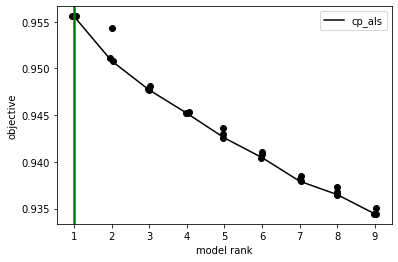

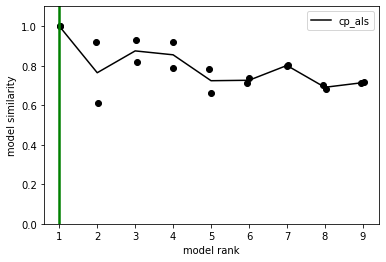

Rank-1 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 0.1s


Rank-2 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 0.3s


Rank-3 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.2s


Rank-4 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.4s


Rank-5 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.5s


Rank-6 models:  min obj, 0.90;  max obj, 0.91;  time to fit, 0.4s


Rank-7 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.6s


Rank-8 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.6s


Rank-9 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.6s


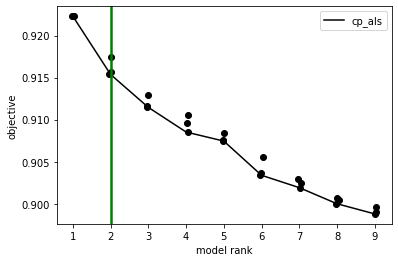

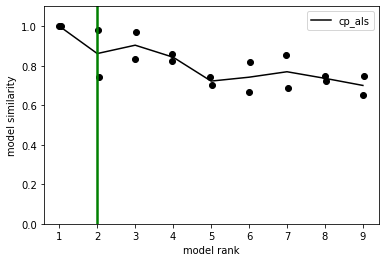

Rank-1 models:  min obj, 0.95;  max obj, 0.95;  time to fit, 0.7s


Rank-2 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.5s


Rank-3 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.5s


Rank-4 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.8s


Rank-5 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.7s


Rank-6 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.6s


Rank-7 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 1.9s


Rank-8 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 2.2s


Rank-9 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 2.3s


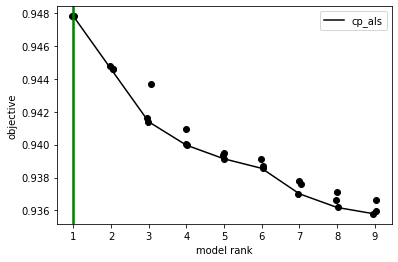

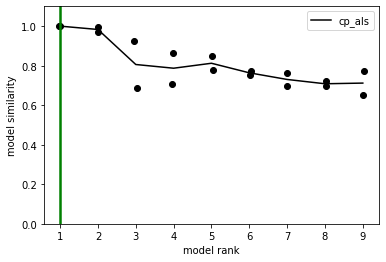

Rank-1 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.2s


Rank-2 models:  min obj, 0.94;  max obj, 0.94;  time to fit, 0.3s


Rank-3 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 0.4s


Rank-4 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 0.5s


Rank-5 models:  min obj, 0.93;  max obj, 0.93;  time to fit, 0.6s


Rank-6 models:  min obj, 0.92;  max obj, 0.93;  time to fit, 0.7s


Rank-7 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 0.9s


Rank-8 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 0.8s


Rank-9 models:  min obj, 0.92;  max obj, 0.92;  time to fit, 0.8s


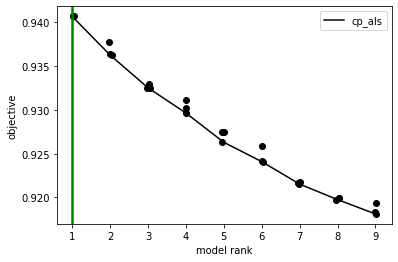

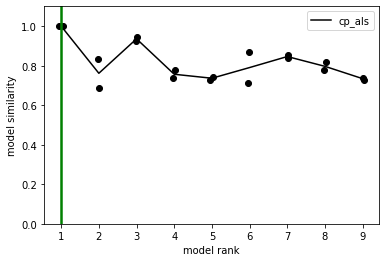

In [83]:
# this script is for similarity score and error plot from cpd_ensemble.py (Alex- Github)

# Fit ensembles of tensor decompositions.
methods = (
  'cp_als',    # fits unconstrained tensor decomposition.
  # 'ncp_bcd',   # fits nonnegative tensor decomposition.
  # 'ncp_hals',  # fits nonnegative tensor decomposition.
)

# Plotting options for the unconstrained and nonnegative models.
plot_options = {
  'cp_als': {
    'line_kw': {
      'color': 'black',
      'label': 'cp_als',
    },
    'scatter_kw': {
      'color': 'black',
    },
  },
  'ncp_hals': {
    'line_kw': {
      'color': 'blue',
      'alpha': 0.5,
      'label': 'ncp_hals',
    },
    'scatter_kw': {
      'color': 'blue',
      'alpha': 0.5,
    },
  },
  'ncp_bcd': {
    'line_kw': {
      'color': 'red',
      'alpha': 0.5,
      'label': 'ncp_bcd',
    },
    'scatter_kw': {
      'color': 'red',
      'alpha': 0.5,
    },
  },
}

R_13 = [3,3,2,1]
R_39 = [1,2,1,1]

R_mat = R_39


for iA in range(len(area)):
  X= firing_rate[iA]
  I, J, K,= firing_rate[iA].shape
  np.unique(firing_rate[iA])

  ensembles = {}
  for m in methods:
      ensembles[m] = tt.Ensemble(fit_method=m, fit_options=dict(tol=1e-4))
      ensembles[m].fit(X, ranks=range(1, 10), replicates=3)
  
  R= R_mat[iA]
  plt.figure()
  for m in methods:
      tt.plot_objective(ensembles[m], **plot_options[m])
  plt.axvline(x=R, linewidth=2.5, color='g')
  plt.legend()
  fobj = usedAreas[iA] + 'error_plot.png'
  plt.savefig(fobj)

  plt.figure()
  for m in methods:
      tt.plot_similarity(ensembles[m], **plot_options[m])
  plt.axvline(x=R, linewidth=2.5, color='g')
  plt.legend()
  fsc = usedAreas[iA] + 'similarity_score.png'
  plt.savefig(fsc)
  plt.show()


Visualize results and enter the rank for each area here: 

In [ ]:
tt.plot_factors??


CP_ALS: iteration 1, objective 0.9886870818289244, improvement inf.
CP_ALS: iteration 2, objective 0.9505359933075037, improvement 0.038151088521420684.
CP_ALS: iteration 3, objective 0.9485261277245713, improvement 0.0020098655829323686.
CP_ALS: iteration 4, objective 0.9480885685909819, improvement 0.0004375591335894491.
CP_ALS: iteration 5, objective 0.9479463304175828, improvement 0.00014223817339908962.
CP_ALS: iteration 6, objective 0.9478858436278089, improvement 6.0486789773883665e-05.
CP_ALS: iteration 7, objective 0.9478488771388281, improvement 3.696648898077193e-05.
CP_ALS: iteration 8, objective 0.947820441929165, improvement 2.8435209663113525e-05.
CP_ALS: iteration 9, objective 0.9477963215208519, improvement 2.41204083131219e-05.
CP_ALS: iteration 10, objective 0.947775144157736, improvement 2.1177363115909564e-05.
CP_ALS: iteration 11, objective 0.947756361209211, improvement 1.878294852497575e-05.
CP_ALS: iteration 12, objective 0.9477396635857542, improvement 1.66976

/usr/local/lib/python3.6/dist-packages/tensortools/visualization.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(U.rank, U.ndim, **kwargs)


(300,)
(300,)
(300,)
(300,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


CP_ALS: iteration 1, objective 0.9780157446301165, improvement inf.
CP_ALS: iteration 2, objective 0.9407705455854684, improvement 0.03724519904464818.
CP_ALS: iteration 3, objective 0.9406916954816652, improvement 7.885010380315194e-05.
CP_ALS: iteration 4, objective 0.9406914931661616, improvement 2.0231550357241446e-07.
Converged after 4 iterations, 0.0823462259995722 seconds. Objective: 0.9406914931661616.
CP_ALS: iteration 1, objective 0.9949302541321084, improvement inf.
CP_ALS: iteration 2, objective 0.941222704063766, improvement 0.05370755006834249.
CP_ALS: iteration 3, objective 0.9406938509356136, improvement 0.0005288531281523179.
CP_ALS: iteration 4, objective 0.9406915041724373, improvement 2.3467631763418595e-06.
Converged after 4 iterations, 0.07020260599983885 seconds. Objective: 0.9406915041724373.
0.9999999469597634


/usr/local/lib/python3.6/dist-packages/tensortools/visualization.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(U.rank, U.ndim, **kwargs)
/usr/local/lib/python3.6/dist-packages/tensortools/visualization.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(U.rank, U.ndim, **kwargs)
/usr/local/lib/python3.6/dist-packages/tensortools/visualization.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are reta

(300,)
(300,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


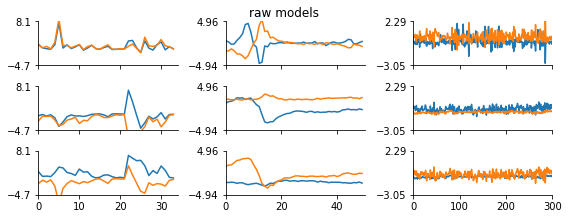

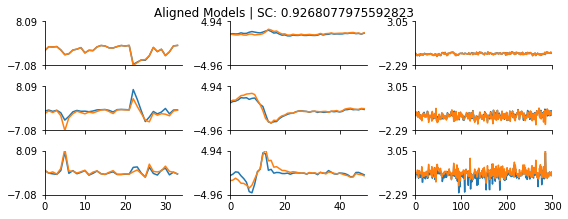

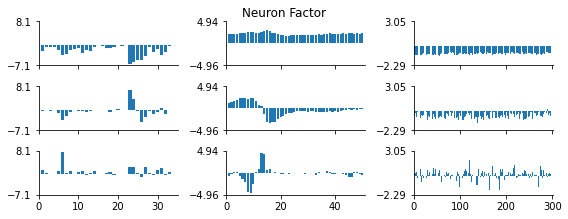

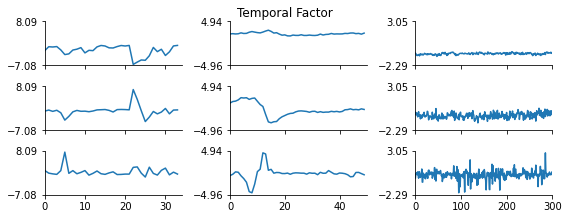

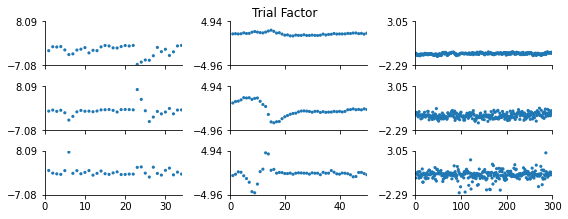

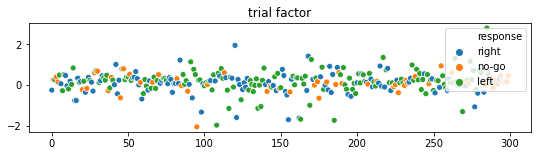

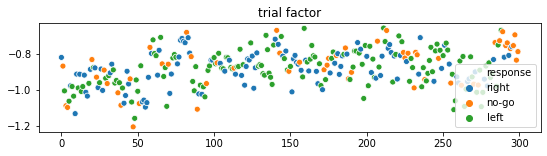

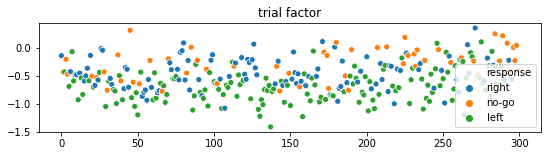

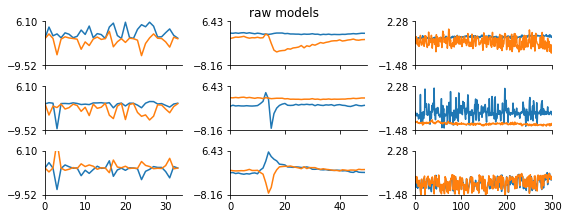

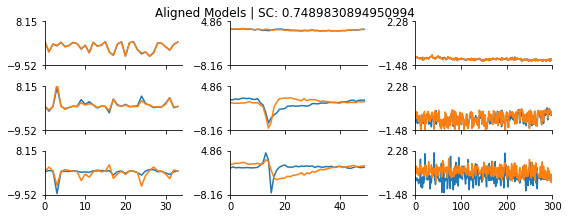

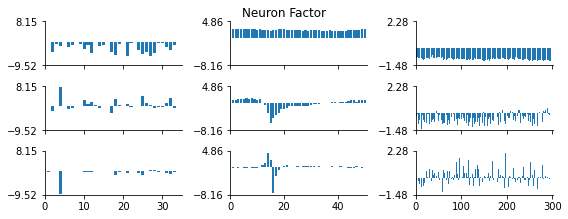

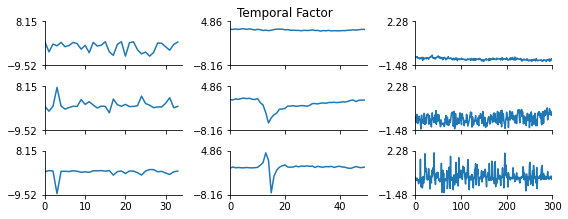

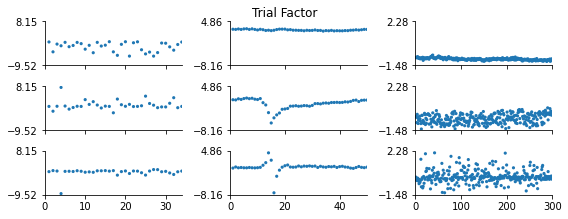

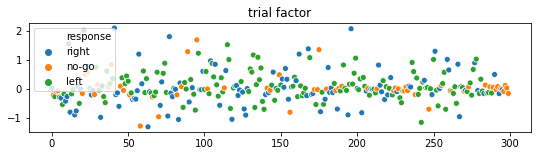

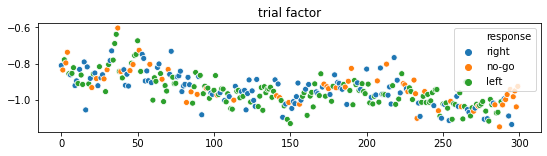

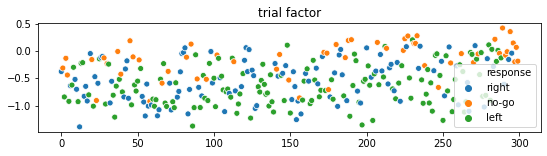

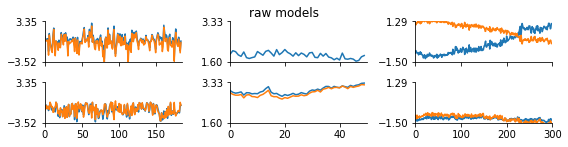

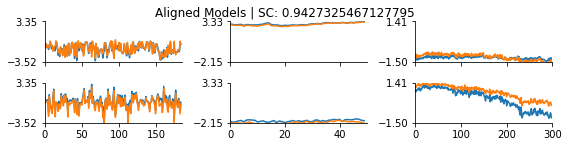

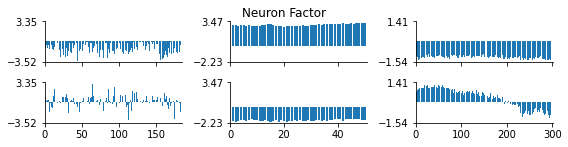

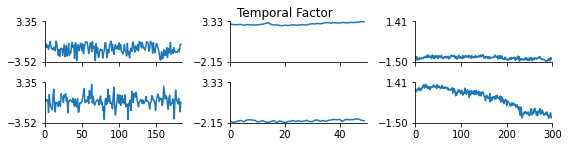

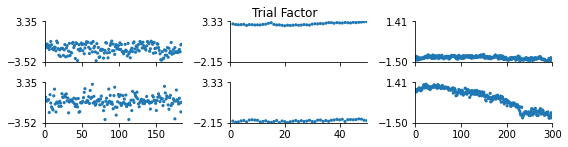

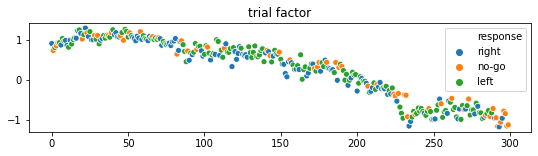

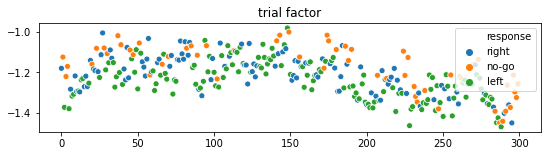

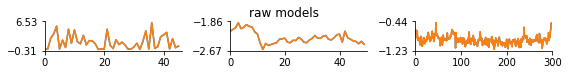

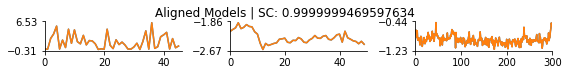

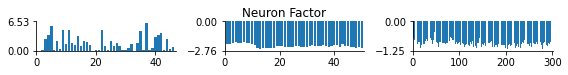

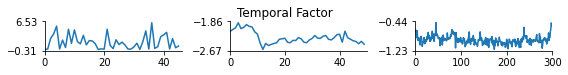

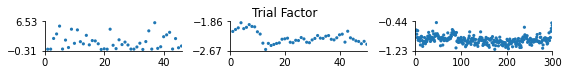

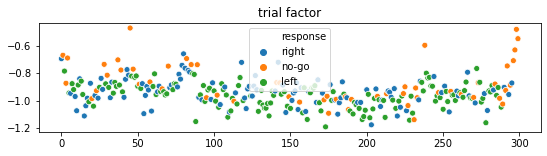

In [84]:
import seaborn as sns

R_13 = [3,3,2,1]
R_39 = [1,2,1,1]

R_mat = R_13

for iA in range(len(area)):
    X= firing_rate[iA]
    R= R_mat[iA]
    ##
    # Fit CP tensor decomposition (two times).
    U = tt.cp_als(X, rank=R, verbose=True)
    V = tt.cp_als(X, rank=R, verbose=True)
    ##
    # Compare the low-dimensional factors from the two fits.
    fig, ax, po = tt.plot_factors(U.factors)
    tt.plot_factors(V.factors, fig=fig)
    fig.suptitle("raw models", y=1)
    fig.tight_layout()
    fraw = usedAreas[iA] + 'raw_models.png'
    plt.savefig(fraw)

    ##
    # Align the two fits and print a similarity score.
    sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True)
    # sim is the similarity score
    print(sim)

    # Plot the results again to see alignment.
    fig, ax, po = tt.plot_factors(U.factors)
    tt.plot_factors(V.factors, fig=fig)
    fig.suptitle("Aligned Models | SC: "+str(sim), y=1)
    fig.tight_layout()
    falign = usedAreas[iA] + 'aligned_models.png'
    plt.savefig(falign)

    # neuron factor
    tt.plot_factors(U.factors, plots='bar')
    plt.suptitle('Neuron Factor',y = 1)
    plt.tight_layout()
    f_nf = usedAreas[iA] + 'neuron_factor.png'
    plt.savefig(f_nf)

    # temporal factor - within trial
    tt.plot_factors(U.factors, plots='line')
    plt.suptitle('Temporal Factor',y = 1)
    plt.tight_layout()
    f_tempf = usedAreas[iA] + 'temporal_factor.png'
    plt.savefig(f_tempf)


    # trial factor - across trial
    tt.plot_factors(U.factors, plots='scatter')
    plt.suptitle('Trial Factor',y = 1)
    plt.tight_layout()
    f_trf = usedAreas[iA] + 'trial_factor.png'
    plt.savefig(f_trf)  

    # adding response colors 
    for ir in range(R):
      x = np.arange(U.factors[2].shape[0])
      y = np.array(U.factors[2][:,ir-1]).squeeze()
      print(x.shape)
      print(y.shape)
      plt.figure(figsize = (9,2))
      sns.scatterplot(x,y,hue = df['response'])
      plt.title('trial factor')
      f_trf_rp = usedAreas[iA] + 'trial_factor_response_r'+str(ir)+'.png'
      plt.savefig(f_trf_rp)

In [ ]:
### trying projections of high and low contrast data 
X_L = X[:,:,contrast_l_high]

X_R = X[:,:,contrast_r_high]

print(X_L.shape)
print(X_R.shape)

(54, 50, 98)
(54, 50, 100)


In [ ]:
neuron_factor = U.factors[0]
print(neuron_factor.shape)

temporal_factor = U.factors[1]
print(temporal_factor.shape)

trial_factor = U.factors[2]
print(trial_factor.shape)

(54, 1)
(50, 1)
(343, 1)


AttributeError: ignored

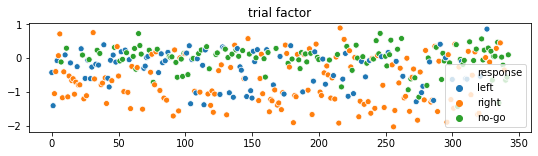

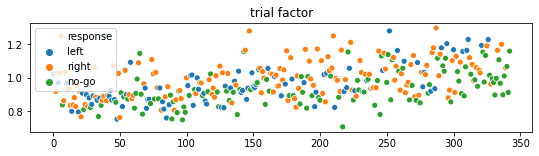

In [68]:
# Generating plots with contrast left and right 
import seaborn as sns
for ir in range(R):
  x = np.arange(U.factors[2].shape[0])
  y = np.array(U.factors[2][:,ir-1]).squeeze()
  #print(x)
  #print(y)
  #print(contrast_l_high.shape)
  #sns.lineplot(x = np.arange(U.factors[1][:,1].shape[0]), y = U.factors[1][:, 1], hue = contrast_l_high)

  plt.figure(figsize = (9,2))
  sns.scatterplot(x,y,hue = df['response'])
  plt.title('trial factor')
  f_trf_rp = usedAreas[iA] + 'trial_factor_response.png'
  plt.savefig(f_trf_rp)

0      False
1      False
2       True
3       True
4      False
5       True
6       True
7      False
8       True
9       True
10     False
11     False
12      True
13      True
14     False
15      True
16      True
17      True
18      True
19     False
20      True
21      True
22     False
23     False
24      True
25     False
26      True
27     False
28     False
29     False
30     False
31      True
32      True
33     False
34     False
35     False
36     False
37      True
38      True
39     False
40      True
41      True
42     False
43     False
44     False
45      True
46     False
47     False
48     False
49      True
50      True
51     False
52     False
53     False
54      True
55     False
56     False
57      True
58     False
59      True
60      True
61     False
62     False
63     False
64      True
65     False
66     False
67     False
68      True
69     False
70     False
71     False
72     False
73     False
74      True
75      True
76     False

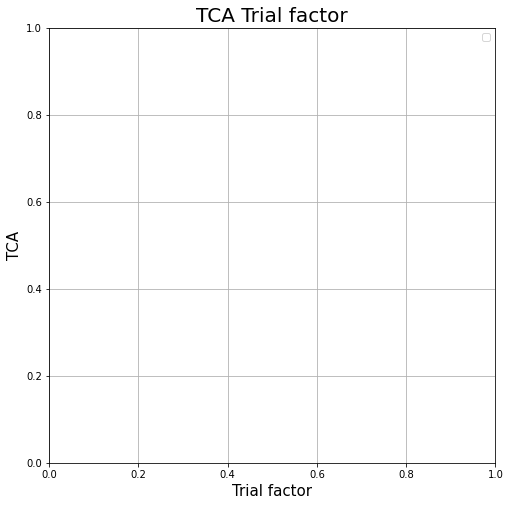

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Trial factor', fontsize = 15)
ax.set_ylabel('TCA', fontsize = 15)
ax.set_title('TCA Trial factor', fontsize = 20)
targets = [-1.0, 0.0, 1.0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['response'] == target
    print(indicesToKeep)
    for i,f in enumerate(U.factors):
      print(i, f)
      x = np.arange(1, f.shape[0]+1)
      print(x.shape)
      #ax.scatter(x,U.factors[2][indicesToKeep], c = color, s = 50)
      #ax.scatter(x, f[:, 1])
ax.legend(targets)
ax.grid()


#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('dPCA', fontsize = 20)
#targets = [-1.0, 0.0, 1.0]
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
    #indicesToKeep = df['response'] == target
    #ax.scatter(Z.loc[indicesToKeep, 't'], z.loc[indicesToKeep, 's', c = color, s = 50)
    ax.scatter(st)
#ax.legend(targets)
#ax.grid()

CP_ALS: iteration 1, objective 0.9987528177417941, improvement inf.
CP_ALS: iteration 2, objective 0.9477429968784893, improvement 0.051009820863304856.
CP_ALS: iteration 3, objective 0.9419819804259729, improvement 0.005761016452516365.
CP_ALS: iteration 4, objective 0.9419594112718706, improvement 2.2569154102369815e-05.
CP_ALS: iteration 5, objective 0.941958545910521, improvement 8.653613495779311e-07.
Converged after 5 iterations, 0.025736132000020007 seconds. Objective: 0.941958545910521.
CP_ALS: iteration 1, objective 0.999292338911335, improvement inf.
CP_ALS: iteration 2, objective 0.9555494659587855, improvement 0.043742872952549416.
CP_ALS: iteration 3, objective 0.9399232734160646, improvement 0.015626192542720907.
CP_ALS: iteration 4, objective 0.939856168973583, improvement 6.710444248159142e-05.
CP_ALS: iteration 5, objective 0.939855777411356, improvement 3.9156222708669475e-07.
Converged after 5 iterations, 0.024200917998314253 seconds. Objective: 0.939855777411356.
0.

ValueError: ignored

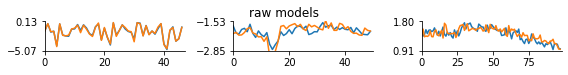

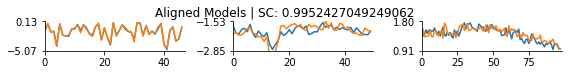

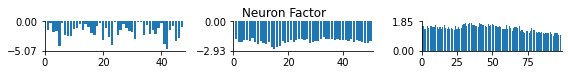

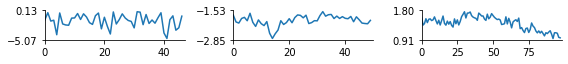

In [ ]:
R_13 = [3,3,2,1]
R_39 = [1,2,1,1]

R_mat = R_39

for iA in range(len(area)):
    X= firing_rate[iA]
    R= R_mat[iA]
    X_L = X[:,:,contrast_l_high]

    X_R = X[:,:,contrast_r_high]
    X_R = X_R[:,:,:X_L.shape[2]]
    ##
    # Fit CP tensor decomposition (two times).
    U = tt.cp_als(X_L, rank=R, verbose=True)
    V = tt.cp_als(X_R, rank=R, verbose=True)
    ##
    # Compare the low-dimensional factors from the two fits.
    fig, ax, po = tt.plot_factors(U.factors)
    tt.plot_factors(V.factors, fig=fig)
    fig.suptitle("raw models", y=1)
    fig.tight_layout()
    fraw = usedAreas[iA] + 'raw_models.png'
    plt.savefig(fraw)

    ##
    # Align the two fits and print a similarity score.
    sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True)
    # sim is the similarity score
    print(sim)

    # Plot the results again to see alignment.
    fig, ax, po = tt.plot_factors(U.factors)
    tt.plot_factors(V.factors, fig=fig)
    fig.suptitle("Aligned Models | SC: "+str(sim), y=1)
    fig.tight_layout()
    #falign = usedAreas[iA] + 'aligned_models.png'
    #plt.savefig(falign)

    # neuron factor
    tt.plot_factors(U.factors, plots='bar')
    plt.suptitle('Neuron Factor',y = 1)
    plt.tight_layout()
    #f_nf = usedAreas[iA] + 'neuron_factor.png'
    #plt.savefig(f_nf)

    # temporal factor - within trial
    fig,ax = tt.plot_factors(U.factors, plots='line')
    tt.plot_factors(V.factors, fig = fig)
    plt.suptitle('Temporal Factor',y = 1)
    plt.tight_layout()
    #f_tempf = usedAreas[iA] + 'temporal_factor.png'
    #plt.savefig(f_tempf)


    # trial factor - across trial
    tt.plot_factors(U.factors, plots='scatter')
    #tt.plot_factors(V.factors, plots = 'scatter')
    plt.suptitle('Trial Factor',y = 1)
    plt.tight_layout()
    #f_trf = usedAreas[iA] + 'trial_factor.png'
    #plt.savefig(f_trf)  

(<Figure size 576x72 with 3 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6770ff8eb8>,
       dtype=object),
 array([[<matplotlib.collections.PathCollection object at 0x7f676e2e9940>,
       dtype=object))

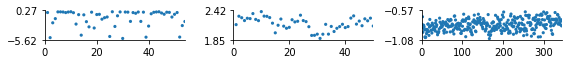

In [ ]:
Xn = firing_rate[2]
R_Xn = np.linalg.matrix_rank(Xn) # finding the rank of our input matrix
print(R_Xn)
print(R_Xn.shape)

[25 25 24 25 25 25 25 16 25 25 25 25 25 25 25  5 24 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 19 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 20 25 24 25 25 25 24 25 25 15 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 24 25 25 25 25 25 25 25  1 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 21
 25 25 25 25 25 25 25 15 25 24 25 25 25 25 25 25 25 15 24 25 25 25  9 25
 25 25 23 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25
 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
(184,)


Rank-1 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.3s


Rank-2 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.5s


Rank-3 models:  min obj, 0.89;  max obj, 0.90;  time to fit, 0.7s


Rank-4 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.5s


Rank-5 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.8s


Rank-6 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 1.1s


Rank-7 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.7s


Rank-8 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.9s


Rank-9 models:  min obj, 0.88;  max obj, 0.89;  time to fit, 1.0s


Rank-10 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.2s


Rank-11 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.3s


Rank-12 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.5s


Rank-13 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.5s


Rank-14 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.4s


Rank-15 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.6s


Rank-16 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.6s


Rank-17 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.7s


Rank-18 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 1.7s


Rank-19 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1.7s


Rank-20 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1.8s


Rank-21 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.1s


Rank-22 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.1s


Rank-23 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.0s


Rank-24 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.2s


Rank-25 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.1s


Rank-26 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.5s


Rank-27 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.5s


Rank-28 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.6s


Rank-29 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.6s


Rank-30 models:  min obj, 0.86;  max obj, 0.87;  time to fit, 2.6s


Rank-31 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2.6s


Rank-32 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2.9s


Rank-33 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2.8s


Rank-34 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2.6s


Rank-35 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.0s


Rank-36 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 2.9s


Rank-37 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.0s


Rank-38 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.1s


Rank-39 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.1s


Rank-40 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.0s


Rank-41 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.6s


Rank-42 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.4s


Rank-43 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.6s


Rank-44 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.5s


Rank-45 models:  min obj, 0.85;  max obj, 0.86;  time to fit, 3.6s


Rank-46 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.1s


Rank-47 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.1s


Rank-48 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 3.7s


Rank-49 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.0s


Rank-50 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.1s


Rank-51 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.0s


Rank-52 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.2s


Rank-53 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.4s


Rank-54 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.3s


Rank-55 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.6s


Rank-56 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.4s


Rank-57 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.3s


Rank-58 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.8s


Rank-59 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.0s


Rank-60 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 4.7s


Rank-61 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.3s


Rank-62 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 5.3s


Rank-63 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 5.3s


Rank-64 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 4.8s


Rank-65 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.4s


Rank-66 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.3s


Rank-67 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.4s


Rank-68 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.6s


Rank-69 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.5s


Rank-70 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.3s


Rank-71 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.1s


Rank-72 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.7s


Rank-73 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.6s


Rank-74 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 5.7s


Rank-75 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.3s


Rank-76 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.2s


Rank-77 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.2s


Rank-78 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.1s


Rank-79 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.3s


Rank-80 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.6s


Rank-81 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 6.6s


Rank-82 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.9s


Rank-83 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.7s


Rank-84 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.7s


Rank-85 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.7s


Rank-86 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.8s


Rank-87 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.7s


Rank-88 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.2s


Rank-89 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.0s


Rank-90 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.2s


Rank-91 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 6.7s


Rank-92 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.0s


Rank-93 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.6s


Rank-94 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.5s


Rank-95 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.4s


Rank-96 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.5s


Rank-97 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 8.1s


Rank-98 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 7.7s


Rank-99 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 8.4s


Rank-1 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.2s


Rank-2 models:  min obj, 0.90;  max obj, 0.91;  time to fit, 0.7s


Rank-3 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 1.8s


Rank-4 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 1.8s


Rank-5 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 2.2s


Rank-6 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 2.3s


Rank-7 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 2.1s


Rank-8 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 2.7s


Rank-9 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 2.9s


Rank-10 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 3.2s


Rank-11 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 3.1s


Rank-12 models:  min obj, 0.88;  max obj, 0.89;  time to fit, 3.1s


Rank-13 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 3.8s


Rank-14 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 3.6s


Rank-15 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 4.0s


Rank-16 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 3.9s


Rank-17 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 4.6s


Rank-18 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 4.9s


Rank-19 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 5.0s


Rank-20 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 5.3s


Rank-21 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 5.5s


Rank-22 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 5.3s


Rank-23 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 6.0s


Rank-24 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 5.9s


Rank-25 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 6.2s


Rank-26 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 7.4s


Rank-27 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 6.7s


Rank-28 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 7.2s


Rank-29 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 7.0s


Rank-30 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 7.3s


Rank-31 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 8.1s


Rank-32 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 7.5s


Rank-33 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 8.0s


Rank-34 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 8.3s


Rank-35 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.0s


Rank-36 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.1s


Rank-37 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.5s


Rank-38 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.9s


Rank-39 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 10.2s


Rank-40 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 10.0s


Rank-41 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.9s


Rank-42 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 9.9s


Rank-43 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 10.7s


Rank-44 models:  min obj, 0.86;  max obj, 0.87;  time to fit, 11.1s


Rank-45 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 11.0s


Rank-46 models:  min obj, 0.86;  max obj, 0.87;  time to fit, 12.0s


Rank-47 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 12.0s


Rank-48 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 12.0s


Rank-49 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 12.3s


Rank-50 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 12.0s


Rank-51 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 13.6s


Rank-52 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 13.1s


Rank-53 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 13.5s


Rank-54 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 12.9s


Rank-55 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.7s


Rank-56 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.8s


Rank-57 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.3s


Rank-58 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.5s


Rank-59 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.7s


Rank-60 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.8s


Rank-61 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 15.1s


Rank-62 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 15.4s


Rank-63 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 15.4s


Rank-64 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 14.6s


Rank-65 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 16.7s


Rank-66 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 17.2s


Rank-67 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 16.8s


Rank-68 models:  min obj, 0.85;  max obj, 0.86;  time to fit, 16.9s


Rank-69 models:  min obj, 0.85;  max obj, 0.86;  time to fit, 17.8s


Rank-70 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 17.8s


Rank-71 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 16.7s


Rank-72 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 17.5s


Rank-73 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 17.5s


Rank-74 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.4s


Rank-75 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.0s


Rank-76 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.2s


Rank-77 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.6s


Rank-78 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.3s


Rank-79 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.1s


Rank-80 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 18.6s


Rank-81 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 20.0s


Rank-82 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.3s


Rank-83 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.4s


Rank-84 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.4s


Rank-85 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.8s


Rank-86 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 19.9s


Rank-87 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 20.0s


Rank-88 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 21.2s


Rank-89 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 20.3s


Rank-90 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 21.0s


Rank-91 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 20.8s


Rank-92 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 21.7s


Rank-93 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 21.9s


Rank-94 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 22.6s


Rank-95 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 22.8s


Rank-96 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 23.2s


Rank-97 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 24.2s


Rank-98 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 25.2s


Rank-99 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 25.8s


Rank-1 models:  min obj, 0.91;  max obj, 0.91;  time to fit, 0.1s


Rank-2 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.4s


Rank-3 models:  min obj, 0.90;  max obj, 0.90;  time to fit, 0.5s


Rank-4 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.5s


Rank-5 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.5s


Rank-6 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.6s


Rank-7 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.6s


Rank-8 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.6s


Rank-9 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.8s


Rank-10 models:  min obj, 0.89;  max obj, 0.89;  time to fit, 0.9s


Rank-11 models:  min obj, 0.88;  max obj, 0.89;  time to fit, 1.0s


Rank-12 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.0s


Rank-13 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.0s


Rank-14 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.1s


Rank-15 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.2s


Rank-16 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.1s


Rank-17 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.1s


Rank-18 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.2s


Rank-19 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.4s


Rank-20 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.4s


Rank-21 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.4s


Rank-22 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.3s


Rank-23 models:  min obj, 0.88;  max obj, 0.88;  time to fit, 1.7s


Rank-24 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 1.6s


Rank-25 models:  min obj, 0.87;  max obj, 0.88;  time to fit, 1.6s


Rank-26 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1.9s


Rank-27 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.0s


Rank-28 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1.8s


Rank-29 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.1s


Rank-30 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.0s


Rank-31 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 1.9s


Rank-32 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.2s


Rank-33 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.1s


Rank-34 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.2s


Rank-35 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 3.0s


Rank-36 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.5s


Rank-37 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.3s


Rank-38 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.7s


Rank-39 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.9s


Rank-40 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.7s


Rank-41 models:  min obj, 0.87;  max obj, 0.87;  time to fit, 2.6s


Rank-42 models:  min obj, 0.86;  max obj, 0.87;  time to fit, 3.0s


Rank-43 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.1s


Rank-44 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.3s


Rank-45 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.3s


Rank-46 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.4s


Rank-47 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.5s


Rank-48 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.4s


Rank-49 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.2s


Rank-50 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.2s


Rank-51 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.0s


Rank-52 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.5s


Rank-53 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.8s


Rank-54 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.6s


Rank-55 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.3s


Rank-56 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 3.8s


Rank-57 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.0s


Rank-58 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.1s


Rank-59 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.8s


Rank-60 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.3s


Rank-61 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.7s


Rank-62 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 5.1s


Rank-63 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.8s


Rank-64 models:  min obj, 0.86;  max obj, 0.86;  time to fit, 4.4s


Rank-65 models:  min obj, 0.85;  max obj, 0.86;  time to fit, 4.9s


Rank-66 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.1s


Rank-67 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.6s


Rank-68 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.3s


Rank-69 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.5s


Rank-70 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.9s


Rank-71 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.8s


Rank-72 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.6s


Rank-73 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.0s


Rank-74 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.2s


Rank-75 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.6s


Rank-76 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.5s


Rank-77 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 5.9s


Rank-78 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.2s


Rank-79 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.8s


Rank-80 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.5s


Rank-81 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.8s


Rank-82 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.7s


Rank-83 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.7s


Rank-84 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.0s


Rank-85 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 7.5s


Rank-86 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 7.4s


Rank-87 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 7.0s


Rank-88 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.9s


Rank-89 models:  min obj, 0.85;  max obj, 0.85;  time to fit, 6.8s


Rank-90 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 7.6s


Rank-91 models:  min obj, 0.84;  max obj, 0.85;  time to fit, 6.9s


Rank-92 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 7.0s


Rank-93 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 7.3s


Rank-94 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 7.4s


Rank-95 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 7.6s


Rank-96 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 7.6s


Rank-97 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 9.1s


Rank-98 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 9.4s


Rank-99 models:  min obj, 0.84;  max obj, 0.84;  time to fit, 8.4s


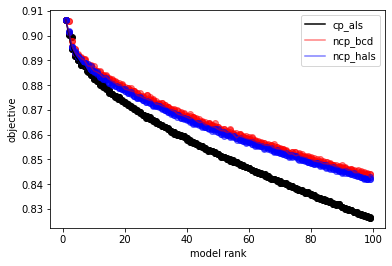

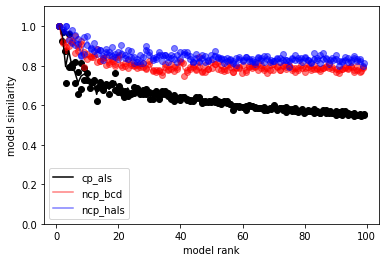

In [ ]:
# this script is for similarity score and error plot from cpd_ensemble.py (Alex- Github)

# Fit ensembles of tensor decompositions.
methods = (
  'cp_als',    # fits unconstrained tensor decomposition.
  'ncp_bcd',   # fits nonnegative tensor decomposition.
  'ncp_hals',  # fits nonnegative tensor decomposition.
)


ensembles = {}
for m in methods:
    ensembles[m] = tt.Ensemble(fit_method=m, fit_options=dict(tol=1e-4))
    ensembles[m].fit(Xn, ranks=range(1, 100), replicates=3)

# Plotting options for the unconstrained and nonnegative models.
plot_options = {
  'cp_als': {
    'line_kw': {
      'color': 'black',
      'label': 'cp_als',
    },
    'scatter_kw': {
      'color': 'black',
    },
  },
  'ncp_hals': {
    'line_kw': {
      'color': 'blue',
      'alpha': 0.5,
      'label': 'ncp_hals',
    },
    'scatter_kw': {
      'color': 'blue',
      'alpha': 0.5,
    },
  },
  'ncp_bcd': {
    'line_kw': {
      'color': 'red',
      'alpha': 0.5,
      'label': 'ncp_bcd',
    },
    'scatter_kw': {
      'color': 'red',
      'alpha': 0.5,
    },
  },
}

# Plot similarity and error plots.
plt.figure()
for m in methods:
    tt.plot_objective(ensembles[m], **plot_options[m])
plt.legend()

plt.figure()
for m in methods:
    tt.plot_similarity(ensembles[m], **plot_options[m])
plt.legend()

plt.show()

In [ ]:
# X - tensor input 
# figure out what should be the rank of the input matrix 

X = firing_rate[2]
R =3

U = tt.cp_als(X, rank= R, verbose = True)
V= tt.cp_als(X,rank=R,verbose=True)

CP_ALS: iteration 1, objective 0.9552078457315368, improvement inf.
CP_ALS: iteration 2, objective 0.9001241008665751, improvement 0.0550837448649617.
CP_ALS: iteration 3, objective 0.8976450265043211, improvement 0.00247907436225403.
CP_ALS: iteration 4, objective 0.8964525883366832, improvement 0.0011924381676379214.
CP_ALS: iteration 5, objective 0.8960027106077266, improvement 0.0004498777289565492.
CP_ALS: iteration 6, objective 0.8958302073834482, improvement 0.0001725032242784197.
CP_ALS: iteration 7, objective 0.895713260831363, improvement 0.00011694655208516203.
CP_ALS: iteration 8, objective 0.8956064541686433, improvement 0.00010680666271978279.
CP_ALS: iteration 9, objective 0.8955010251498533, improvement 0.0001054290187899598.
CP_ALS: iteration 10, objective 0.8953950827169324, improvement 0.00010594243292094685.
CP_ALS: iteration 11, objective 0.895288514619034, improvement 0.00010656809789832966.
CP_ALS: iteration 12, objective 0.8951818939350277, improvement 0.0001066

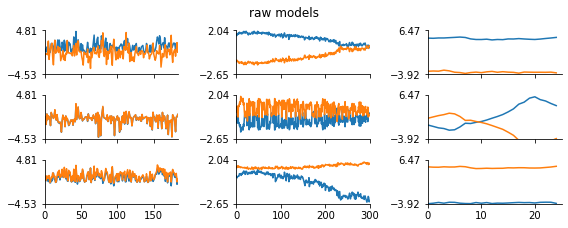

In [ ]:
fig, ax, po = tt.plot_factors(U.factors)
#fig.figsize=(20,16)
tt.plot_factors(V.factors, fig=fig)
fig.suptitle("raw models",y=1.04)
fig.tight_layout()

0.8676319140746164


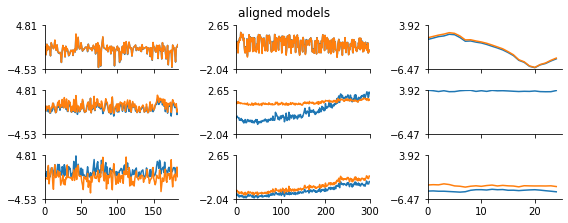

In [ ]:
# Align the two fits and print a similarity score.
sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True) # sim is the similarity score 
print(sim)

# Plot the results again to see alignment.
fig, ax, po = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)
fig.suptitle("aligned models",y=1.02)
fig.tight_layout()

# Show plots.
plt.show()

In [ ]:
X_all = np.concatenate([firing_rate[0],firing_rate[1],firing_rate[2],firing_rate[3]],0)
#X = np.hstack(firing_rate[1])
print(X_all.shape)


(298, 300, 25)


CP_ALS: iteration 1, objective 0.9895573163375165, improvement inf.
CP_ALS: iteration 2, objective 0.9010405897528545, improvement 0.08851672658466203.
CP_ALS: iteration 3, objective 0.8985393308556159, improvement 0.002501258897238623.
CP_ALS: iteration 4, objective 0.8965344350525687, improvement 0.002004895803047191.
CP_ALS: iteration 5, objective 0.8951773011055956, improvement 0.0013571339469731214.
CP_ALS: iteration 6, objective 0.8948586527645693, improvement 0.00031864834102623973.
CP_ALS: iteration 7, objective 0.8947414668908014, improvement 0.00011718587376796652.
CP_ALS: iteration 8, objective 0.8946765158907937, improvement 6.495100000769582e-05.
CP_ALS: iteration 9, objective 0.8946319997110219, improvement 4.451617977174749e-05.
CP_ALS: iteration 10, objective 0.8945967976116572, improvement 3.5202099364695094e-05.
CP_ALS: iteration 11, objective 0.8945659849915939, improvement 3.081262006332519e-05.
CP_ALS: iteration 12, objective 0.8945370550405569, improvement 2.89299

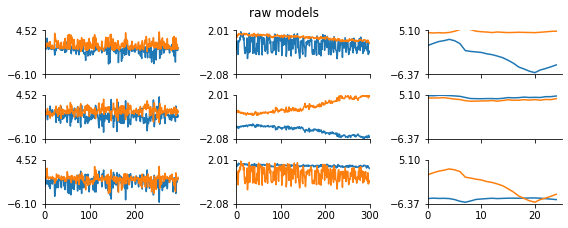

In [ ]:
R =3

U = tt.cp_als(X_all, rank= R, verbose = True)
V= tt.cp_als(X_all,rank=R,verbose=True)

fig, ax, po = tt.plot_factors(U.factors)
#fig.figsize=(20,16)
tt.plot_factors(V.factors, fig=fig)
fig.suptitle("raw models",y=1.04)
fig.tight_layout()

0.9799431684637466


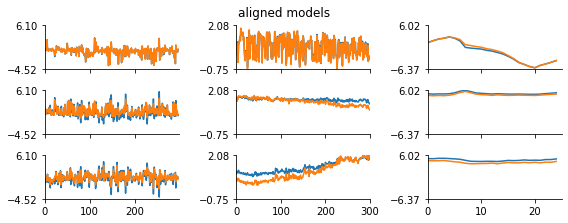

In [ ]:
# Align the two fits and print a similarity score.
sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True) # sim is the similarity score 
print(sim)

# Plot the results again to see alignment.
fig, ax, po = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)
fig.suptitle("aligned models",y=1.02)
fig.tight_layout()

# Show plots.
plt.show()

In [ ]:
# TODO - not needed for Tensor 
def moveMean_step(stepSize,data,axis): 
  # now only work up to 2 D
  in_n=data.shape[axis]
  out_n=np.ceil(in_n/stepSize)
  if axis==0:
    out_mat=np.zeros((out_n,data.shape[1]))
  else:
    out_mat=np.zeros((out_n,data.shape[0]))
  for i in range(out_n):
    



  



In [ ]:
########################### defined the whole trial matrix for PCA ###########################
smpCellN=int(np.min(cellN))
MOs = area[len(area)-1] # in reality loop through each region
cell_i = np.random.choice(np.arange(0,MOs.shape[0]+1), smpCellN, replace=False)
MOs_sampled = MOs[cell_i,:,:]

for i in range(MOs_sampled.shape[1]):
    if i == 0:
        MOs_mat = np.rollaxis(MOs_sampled[:,i,:], 1, 0)
    else:
        tmp = np.rollaxis(MOs_sampled[:,1,:], 1, 0)
        MOs_mat = np.append(MOs_mat, tmp, axis=0)
print(MOs_mat.shape)
# the data is now down sampled to 34 neurons without replacement 
# (34 is the min cell num across regions)
# this session has 300 trils and 250 bins each 
# so MOs_mat now has 34 columns and 75000(=250*300) rows

# we'll bin then into 25*300 rows where 
# each row has 100 ms averaged FR, not overlapped in time








(75000, 34)


In [ ]:
########################### estimate sig PCs for whole trial ###########################

In [ ]:
########################### define a event by time bin matrix  ###########################

In [ ]:
########################### estimate sig PCs for events ###########################